### Import Dependencies:

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as data
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

### Choose start and end dates of data:

In [6]:
start = '2013-01-01'
end = '2022-12-31'

### Scrape data from Yahoo Finance:

In [7]:
df = yf.download('AAPL', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.791189,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.579241,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.117430,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.022625,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.065750,458707200


### Set default integer index as index:

In [8]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.791189,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.579241,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.117430,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.022625,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.065750,458707200


### Drop features that will not be used:

In [9]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200


### Plot all closes:

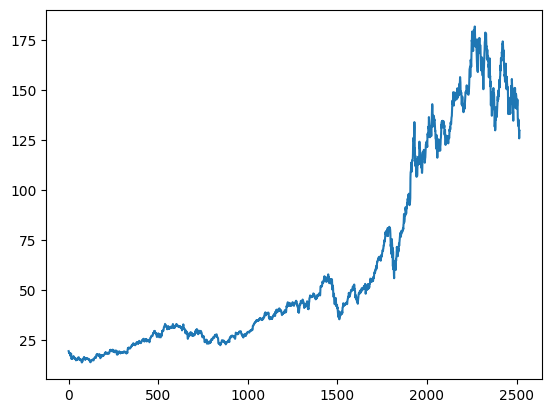

In [10]:
plt.plot(df.Close)

### Calculating the moving average of closes for the previous 100 days:

In [11]:
ma100 = df.Close.rolling(100).mean()
print(ma100)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513    150.515600
2514    150.157800
2515    149.764699
2516    149.412100
2517    149.062199
Name: Close, Length: 2518, dtype: float64


### Plot the moving average of 100 days with the closes:

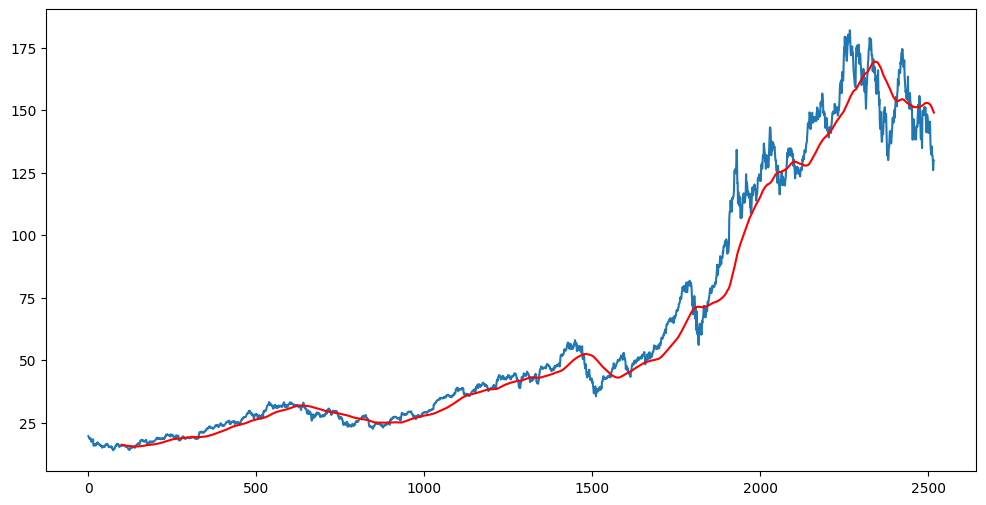

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

### Calculate the moving average of closes for the previous 200 days:

In [48]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2513    152.1331
2514    152.0096
2515    151.8867
2516    151.7593
2517    151.6110
Name: Close, Length: 2518, dtype: float64

### Plot the moving average of 200 days with the moving average of 100 days and the closes:

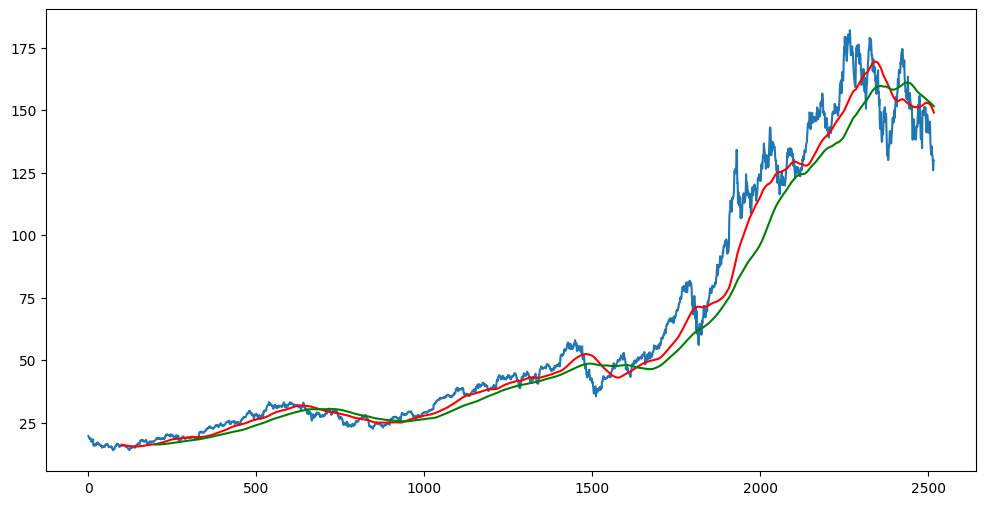

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

### Check the dimensions of the data:

In [15]:
df.shape

(2518, 5)

### Splitting data into training and testing:

In [16]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1762, 1)
(756, 1)


### Check training data:

In [17]:
data_training.head()

,Close
0,19.608213
1,19.360714
2,18.821428
3,18.710714
4,18.761070


### Check testing data:

In [18]:
data_testing.head()

,Close
1762,75.087502
1763,74.357498
1764,74.949997
1765,74.597504
1766,75.797501


### Create scaler to fit data between 0 and 1:

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))

### Fit training data to be between 0 and 1:

In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape

(1762, 1)

### Creating input data and corresponding target value arrays:

In [21]:
x_train = []
y_train = []

### Adding relevant data to each array:

In [22]:
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0]) 

In [23]:
x_train

[array([[0.09519404],
        [0.09103193],
        [0.08196297],
        [0.08010114],
        [0.08094796],
        [0.07601711],
        [0.07986693],
        [0.07793902],
        [0.066798  ],
        [0.05729061],
        [0.06940456],
        [0.06735653],
        [0.06574697],
        [0.06861179],
        [0.07416127],
        [0.0360176 ],
        [0.02963928],
        [0.03561519],
        [0.04068418],
        [0.03981934],
        [0.03901454],
        [0.03789143],
        [0.03110473],
        [0.04042595],
        [0.04013166],
        [0.0466601 ],
        [0.05072011],
        [0.05369303],
        [0.04646791],
        [0.04593338],
        [0.04568114],
        [0.04181932],
        [0.04171719],
        [0.03502661],
        [0.03335094],
        [0.03620377],
        [0.03139302],
        [0.03509868],
        [0.03245606],
        [0.03055219],
        [0.0239877 ],
        [0.01772952],
        [0.02439009],
        [0.02109884],
        [0.02405376],
        [0

### Converting arrays into numPy arrays

In [24]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

### Check the summary of the model:

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

### Compile the model:

In [27]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50


2023-10-31 13:52:56.226496: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


52/52 [==============================] - 7s 116ms/step - loss: 0.0351
Epoch 2/50
52/52 [==============================] - 6s 116ms/step - loss: 0.0090
Epoch 3/50
52/52 [==============================] - 6s 120ms/step - loss: 0.0054
Epoch 4/50
52/52 [==============================] - 6s 119ms/step - loss: 0.0054
Epoch 5/50
52/52 [==============================] - 6s 119ms/step - loss: 0.0050
Epoch 6/50
52/52 [==============================] - 6s 119ms/step - loss: 0.0044
Epoch 7/50
52/52 [==============================] - 6s 119ms/step - loss: 0.0037
Epoch 8/50
52/52 [==============================] - 6s 118ms/step - loss: 0.0043
Epoch 9/50
52/52 [==============================] - 6s 119ms/step - loss: 0.0041
Epoch 10/50
52/52 [==============================] - 6s 119ms/step - loss: 0.0038
Epoch 11/50
52/52 [==============================] - 6s 119ms/step - loss: 0.0038
Epoch 12/50
52/52 [==============================] - 6s 120ms/step - loss: 0.0037
Epoch 13/50
52/52 [=================

### Save the model into the directory:

In [28]:
model.save('keras_model.h5')

### Check testing data:

In [29]:
data_testing.head()

,Close
1762,75.087502
1763,74.357498
1764,74.949997
1765,74.597504
1766,75.797501


### Need previous 100 days from start of testing data:

In [30]:
data_training.tail(100)

,Close
1662,50.247501
1663,50.119999
1664,52.242500
1665,50.687500
1666,50.435001
...,...
1757,71.067497
1758,72.477501
1759,72.449997
1760,72.879997


In [31]:
past_100_days = data_training.tail(100)

In [33]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [34]:
final_df.head()

,Close
0,50.247501
1,50.119999
2,52.242500
3,50.687500
4,50.435001


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[9.66733230e-04],
       [0.00000000e+00],
       [1.60929672e-02],
       [4.30283636e-03],
       [2.38837252e-03],
       [1.14110328e-02],
       [1.87087928e-02],
       [1.87277375e-02],
       [2.30495187e-02],
       [2.27083391e-02],
       [4.09432810e-03],
       [1.13920880e-02],
       [6.97552517e-03],
       [9.57237702e-03],
       [1.61687752e-02],
       [1.56570059e-02],
       [9.89461179e-03],
       [1.65099837e-02],
       [2.42626497e-02],
       [2.42247312e-02],
       [2.59496605e-02],
       [3.07453214e-02],
       [4.38054466e-02],
       [4.28576870e-02],
       [3.46311413e-02],
       [3.68109766e-02],
       [3.83273976e-02],
       [4.22511360e-02],
       [3.88202511e-02],
       [3.26977037e-02],
       [3.45742780e-02],
       [3.26029220e-02],
       [3.89529224e-02],
       [3.67920318e-02],
       [3.47638415e-02],
       [4.45257531e-02],
       [4.57009656e-02],
       [3.50292130e-02],
       [3.85548796e-02],
       [5.02881183e-02],


In [36]:
input_data.shape

(856, 1)

In [37]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [38]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [39]:
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [40]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 1s 28ms/step


In [41]:
y_predicted.shape

(756, 1)

In [42]:
y_test

array([0.18930551, 0.18377057, 0.18826294, 0.18559031, 0.19468878,
       0.20689592, 0.20822275, 0.22079005, 0.21267723, 0.21013724,
       0.21752976, 0.22414516, 0.22005083, 0.22219278, 0.22509292,
       0.22334901, 0.20560698, 0.2221738 , 0.23477899, 0.2338881 ,
       0.20666847, 0.20505727, 0.22437261, 0.22930097, 0.23642808,
       0.22660931, 0.22949048, 0.22581317, 0.24020021, 0.23578361,
       0.23593529, 0.22465693, 0.23341422, 0.22712108, 0.21337857,
       0.18519221, 0.16604745, 0.17470999, 0.1384487 , 0.13814541,
       0.18638639, 0.16839793, 0.19383577, 0.17522182, 0.16784822,
       0.12451668, 0.16085375, 0.14206915, 0.09051103, 0.14688378,
       0.07910003, 0.0992873 , 0.08755403, 0.0839715 , 0.05451515,
       0.04528395, 0.0879521 , 0.08537419, 0.1098643 , 0.08958225,
       0.10298355, 0.10199788, 0.07663585, 0.08425582, 0.07758361,
       0.11750324, 0.11174084, 0.12432712, 0.12796648, 0.13793693,
       0.16409507, 0.15912882, 0.16341271, 0.15603911, 0.14491

In [43]:
y_predicted

array([[0.18607992],
       [0.18889096],
       [0.19181618],
       [0.19482955],
       [0.19787058],
       [0.20090573],
       [0.2039636 ],
       [0.20704429],
       [0.21018729],
       [0.21340355],
       [0.21664487],
       [0.21985856],
       [0.22301517],
       [0.2260449 ],
       [0.22889468],
       [0.23152468],
       [0.23388843],
       [0.23585528],
       [0.23738357],
       [0.23855215],
       [0.23947597],
       [0.24012679],
       [0.2404275 ],
       [0.24041222],
       [0.24019054],
       [0.23994385],
       [0.23978204],
       [0.2397708 ],
       [0.23990883],
       [0.2402398 ],
       [0.24077152],
       [0.24147764],
       [0.24225448],
       [0.24302429],
       [0.24370302],
       [0.24415329],
       [0.24414247],
       [0.24339353],
       [0.24172288],
       [0.23896848],
       [0.23511082],
       [0.23049703],
       [0.22553621],
       [0.22072393],
       [0.21638043],
       [0.21263811],
       [0.20932305],
       [0.206

In [45]:
scaler.scale_[0]

0.007582076226787911

In [46]:
scale_factor = 1/scaler.scale_[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

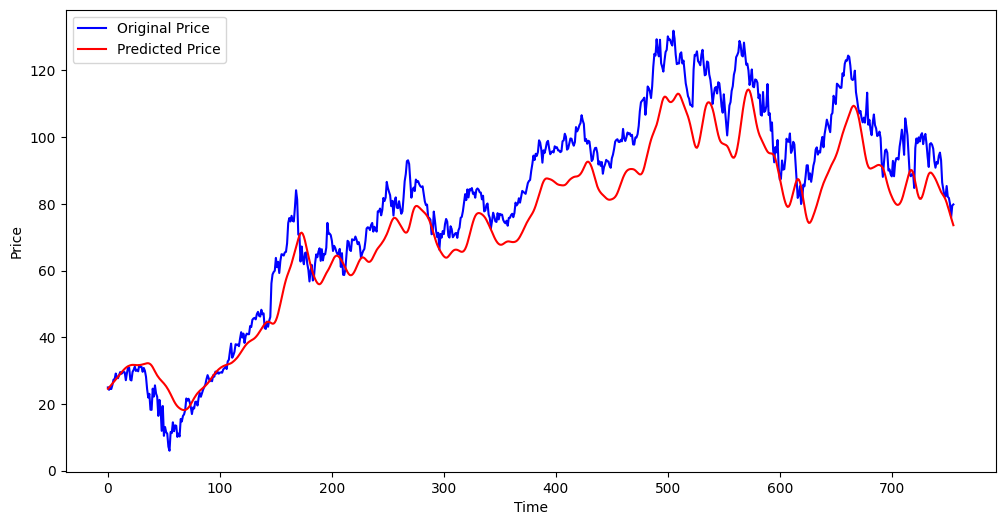

In [47]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_predicted, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()